In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


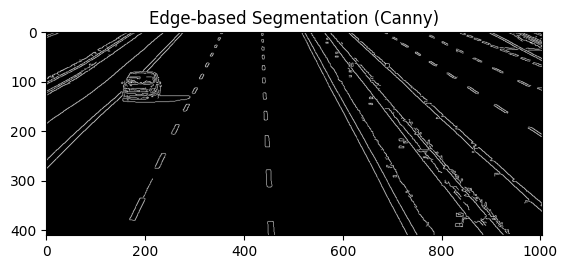

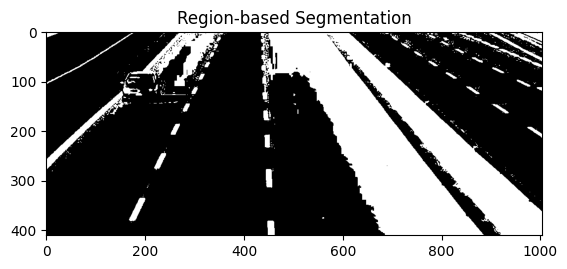

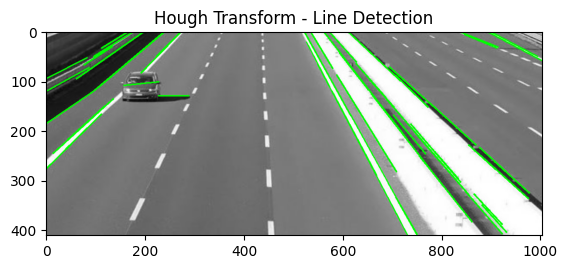

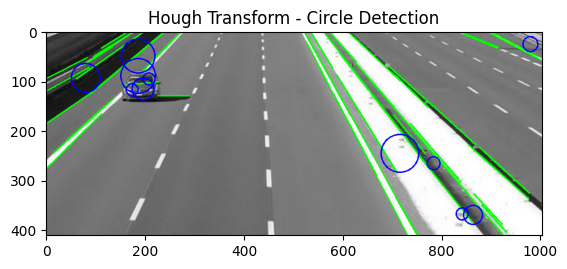

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def edge_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge-based Segmentation (Canny)")
    plt.show()
    return edges

def region_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresholded, cmap='gray')
    plt.title("Region-based Segmentation")
    plt.show()
    return thresholded

def hough_transform(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 75, minLineLength=50, maxLineGap=5)

    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Hough Transform - Line Detection")
    plt.show()

    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=50)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Hough Transform - Circle Detection")
    plt.show()



# def yolo_object_detection(image_path):
#     model = YOLO("yolov8n.pt")
#     results = model(image_path, show=True)
#     return results


image_path = "input.png"
edge_based_segmentation(image_path)
region_based_segmentation(image_path)
hough_transform(image_path)
# yolo_object_detection(image_path)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/road.webp: 640x640 11 cars, 2 trucks, 3 traffic lights, 251.5ms
Speed: 6.6ms preprocess, 251.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 127MB/s]


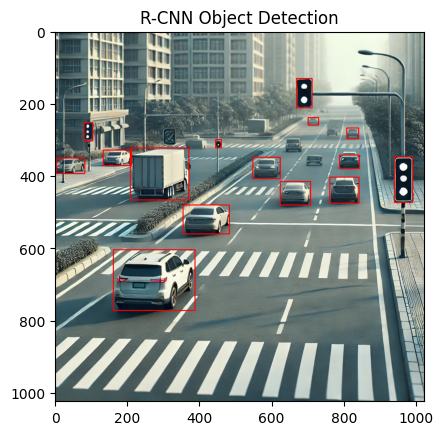

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from ultralytics import YOLO
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt


def rcnn_object_detection(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])

    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    image_np = np.array(image)
    for i, box in enumerate(predictions[0]['boxes']):
        if predictions[0]['scores'][i] > 0.8:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(image_np)
    plt.title("R-CNN Object Detection")
    plt.show()


image_path = "road.webp"
yolo_object_detection(image_path)
rcnn_object_detection(image_path)



image 1/1 /content/road.webp: 640x640 11 cars, 2 trucks, 3 traffic lights, 229.8ms
Speed: 4.7ms preprocess, 229.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


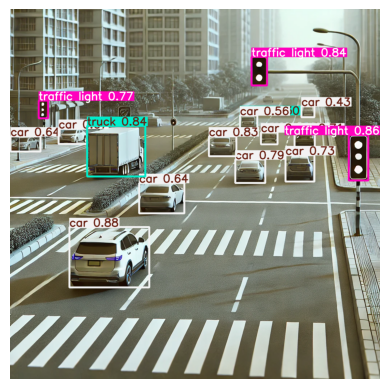

In [ ]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("yolov8n.pt")

def yolo_object_detection(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image_path)
    for result in results:

        annotated_frame = result.plot()
        plt.imshow(annotated_frame)
        plt.axis("off")
        plt.show()


        output_path = "yolo_output.jpg"
        cv2.imwrite(output_path, cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR))


image_path = "road.webp"
yolo_object_detection(image_path)
